<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Load dataset from Hugging Face 🤗

In [3]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00


In [17]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("allenai/reward-bench")

docs = dataset['train']['prompt']

##get a summary of dataset
dataset

Generating train split:   0%|          | 0/5123 [00:00<?, ? examples/s]

Generating filtered split:   0%|          | 0/2985 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'chosen_model', 'rejected', 'rejected_model', 'subset', 'id'],
        num_rows: 5123
    })
    filtered: Dataset({
        features: ['prompt', 'chosen', 'chosen_model', 'rejected', 'rejected_model', 'subset', 'id'],
        num_rows: 2985
    })
})

In [18]:
import random
print(f'number of prompts in dataset: {len(docs)}\n')
r=random.randint(0, len(docs)-1)
print(f'A random entry:\n {docs[r]}')

number of prompts in dataset: 5123

A random entry:
 What are the steps to using random (yet coherent) text as filler content within your Word document?


# Train Top2Vec model. Also save and load.

In [19]:
!pip install top2vec -q

If you have arleady trained a model and saved it, then you can load it with the following prompt and skip the training.

❌
 **Of course the first time through you should skip the next command!**

In [20]:
# Load model
import pickle

with open(my_path+'prompt_deep_model.pkl', 'rb') as f:
    model = pickle.load(f)

The next cell is the work horse, where the model is trained. ⛽: ⏰ It might take some time, so be patient.

In [21]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-31 21:54:56,123 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-31 21:54:58,002 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-31 21:58:06,015 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-31 21:58:16,378 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-31 21:58:16,584 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


After waiting for the model to be trained, you might consider saving it so that next time you don't have to retrain if you come back to this later! 👍 This is what the next cell does.

In [22]:
import pickle

# Save model
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Proceed with topic analysis after retrieving model

In [23]:
model.get_num_topics()

93

In [24]:
model.get_topic_sizes()

(array([171, 111, 107, 102, 102,  84,  83,  82,  80,  80,  76,  75,  74,
         74,  72,  71,  71,  70,  70,  70,  69,  68,  67,  66,  65,  65,
         65,  64,  64,  63,  61,  61,  61,  60,  59,  58,  57,  57,  57,
         57,  56,  56,  56,  55,  53,  53,  52,  50,  49,  49,  48,  48,
         47,  47,  47,  47,  46,  45,  44,  44,  42,  42,  42,  42,  41,
         40,  40,  40,  40,  40,  39,  39,  38,  38,  37,  37,  37,  36,
         36,  36,  34,  34,  34,  34,  32,  31,  30,  28,  28,  28,  23,
         23,  21]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]))

**Question: What do the integers in the first array mean**: ⭕

---



Your Answer:
🙂





In [25]:
model.topic_words[0:3]

array([['sqrt', 'frac', 'mathbf', 'pmatrix', 'real', 'values', 'let',
        'find', 'value', 'minimum', 'integers', 'positive', 'answer',
        'sum', 'triangle', 'form', 'point', 'begin', 'line', 'integer',
        'smallest', 'right', 'points', 'possible', 'abc', 'largest',
        'greater', 'sides', 'try', 'what', 'text', 'set', 'equal',
        'decimal', 'grid', 'than', 'maximum', 'step', 'zero', 'such',
        'many', 'left', 'solution', 'three', 'index', 'term', 'did',
        'through', 'representing', 'valid'],
       ['vec', 'abc', 'integers', 'common', 'solve', 'problem', 'list',
        'function', 'lists', 'elements', 'numbers', 'lst', 'return',
        'rust', 'following', 'write', 'arrays', 'sum', 'int', 'sorted',
        'arr', 'minimum', 'aslist', 'javascript', 'func', 'length',
        'odd', 'unique', 'const', 'grid', 'str', 'non', 'values', 'bool',
        'equal', 'takes', 'digits', 'vector', 'float', 'java', 'public',
        'array', 'maximum', 'empty', 'in

# Documents similar to keywords

##Pick some keywords that look interesting in the top 3-4 topics:

*   model.topic_words[0]
*   model.topic_words[1]
*   model.topic_words[2]
*   etc.

In [26]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["function","integer"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=5)

# This will return the top most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [27]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 4503
Similarity Score: 0.38864144682884216
Document Content: Write a Rust function `even_odd_count(num: i32) -> Vec<i32>` to solve the following problem:
Given an integer. return a tuple that has the number of even and odd digits respectively....
---
Document ID: 4455
Similarity Score: 0.3696746826171875
Document Content: Write a Rust function `even_odd_palindrome(n: i32) -> (i32, i32)` to solve the following problem:
Given a positive integer n, return a tuple that has the number of even and odd
integer palindromes tha...
---
Document ID: 4011
Similarity Score: 0.3656841516494751
Document Content: Write a Go function `func EvenOddCount(num int) [2]int` to solve the following problem:
Given an integer. return a tuple that has the number of even and odd digits respectively.
Example:
EvenOddCount(...
---
Document ID: 4452
Similarity Score: 0.35926353931427
Document Content: Write a Rust function `unique_digits(x:Vec<i32>) -> Vec<i32>` to solve the following problem:
Given a l

# Topic modeling

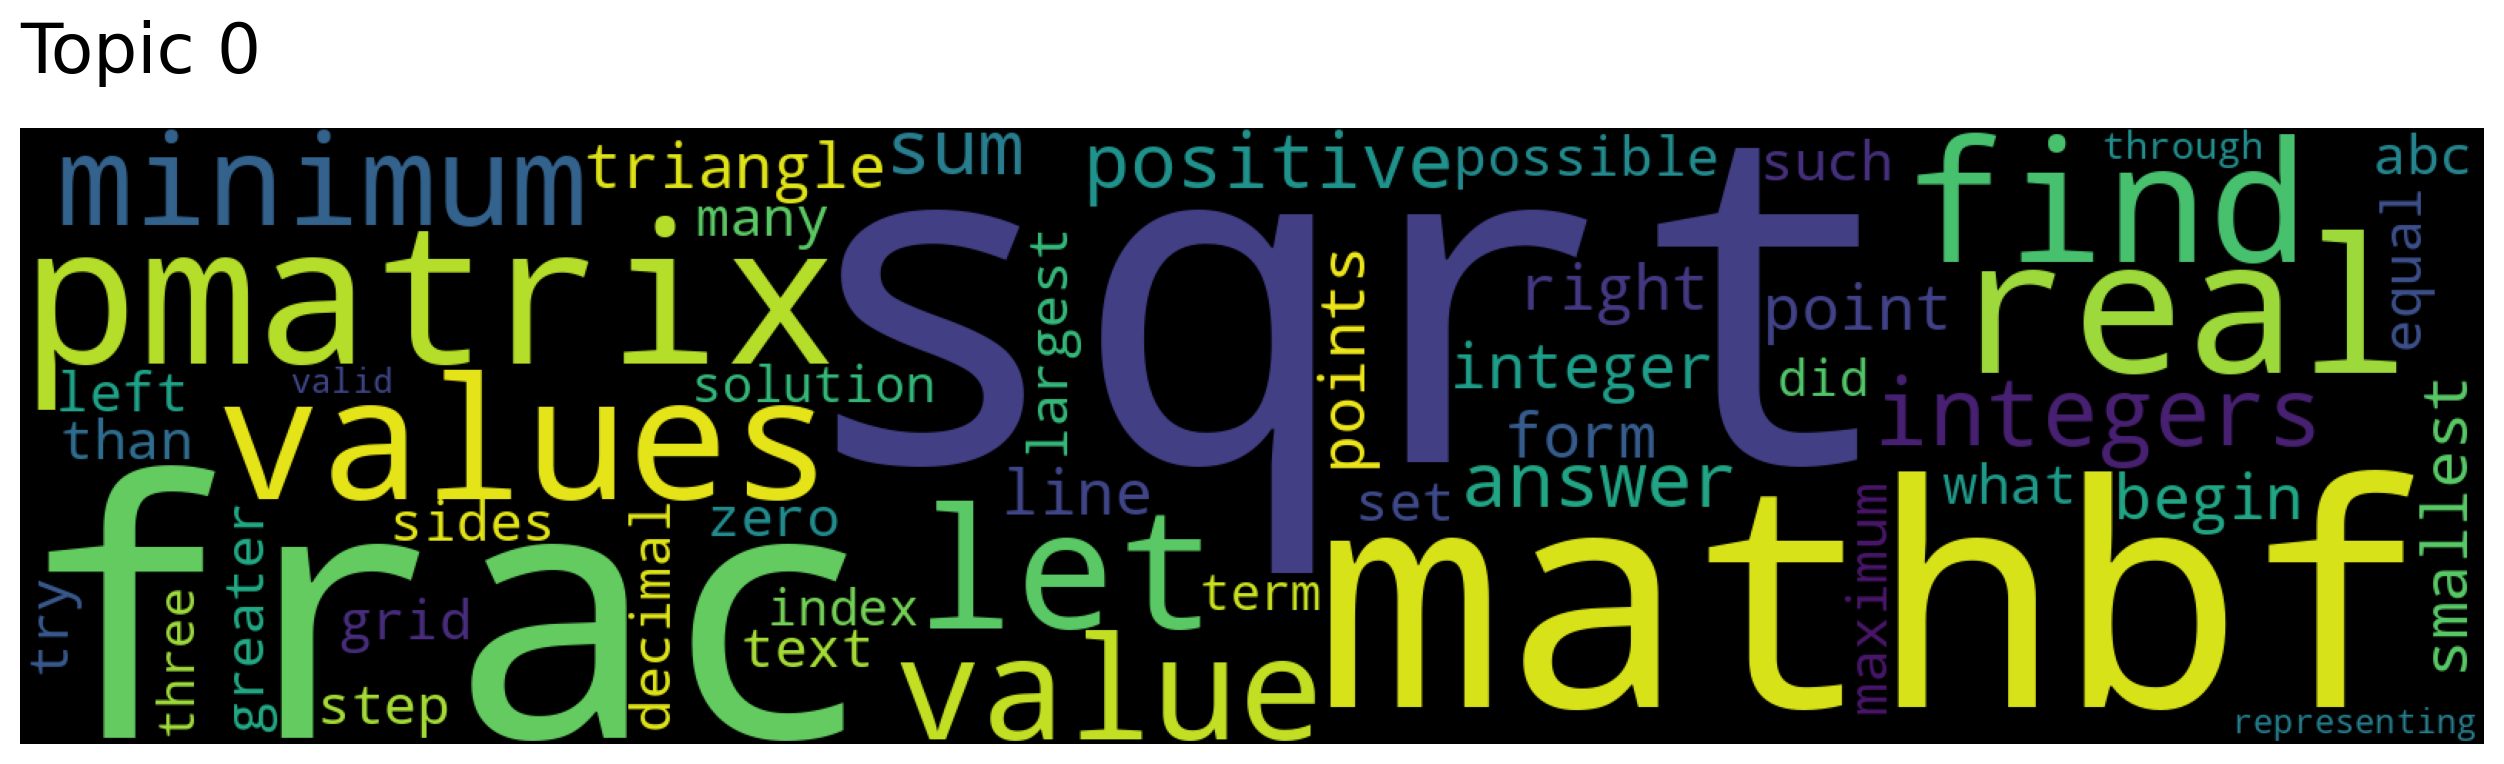

In [28]:
model.generate_topic_wordcloud(0)

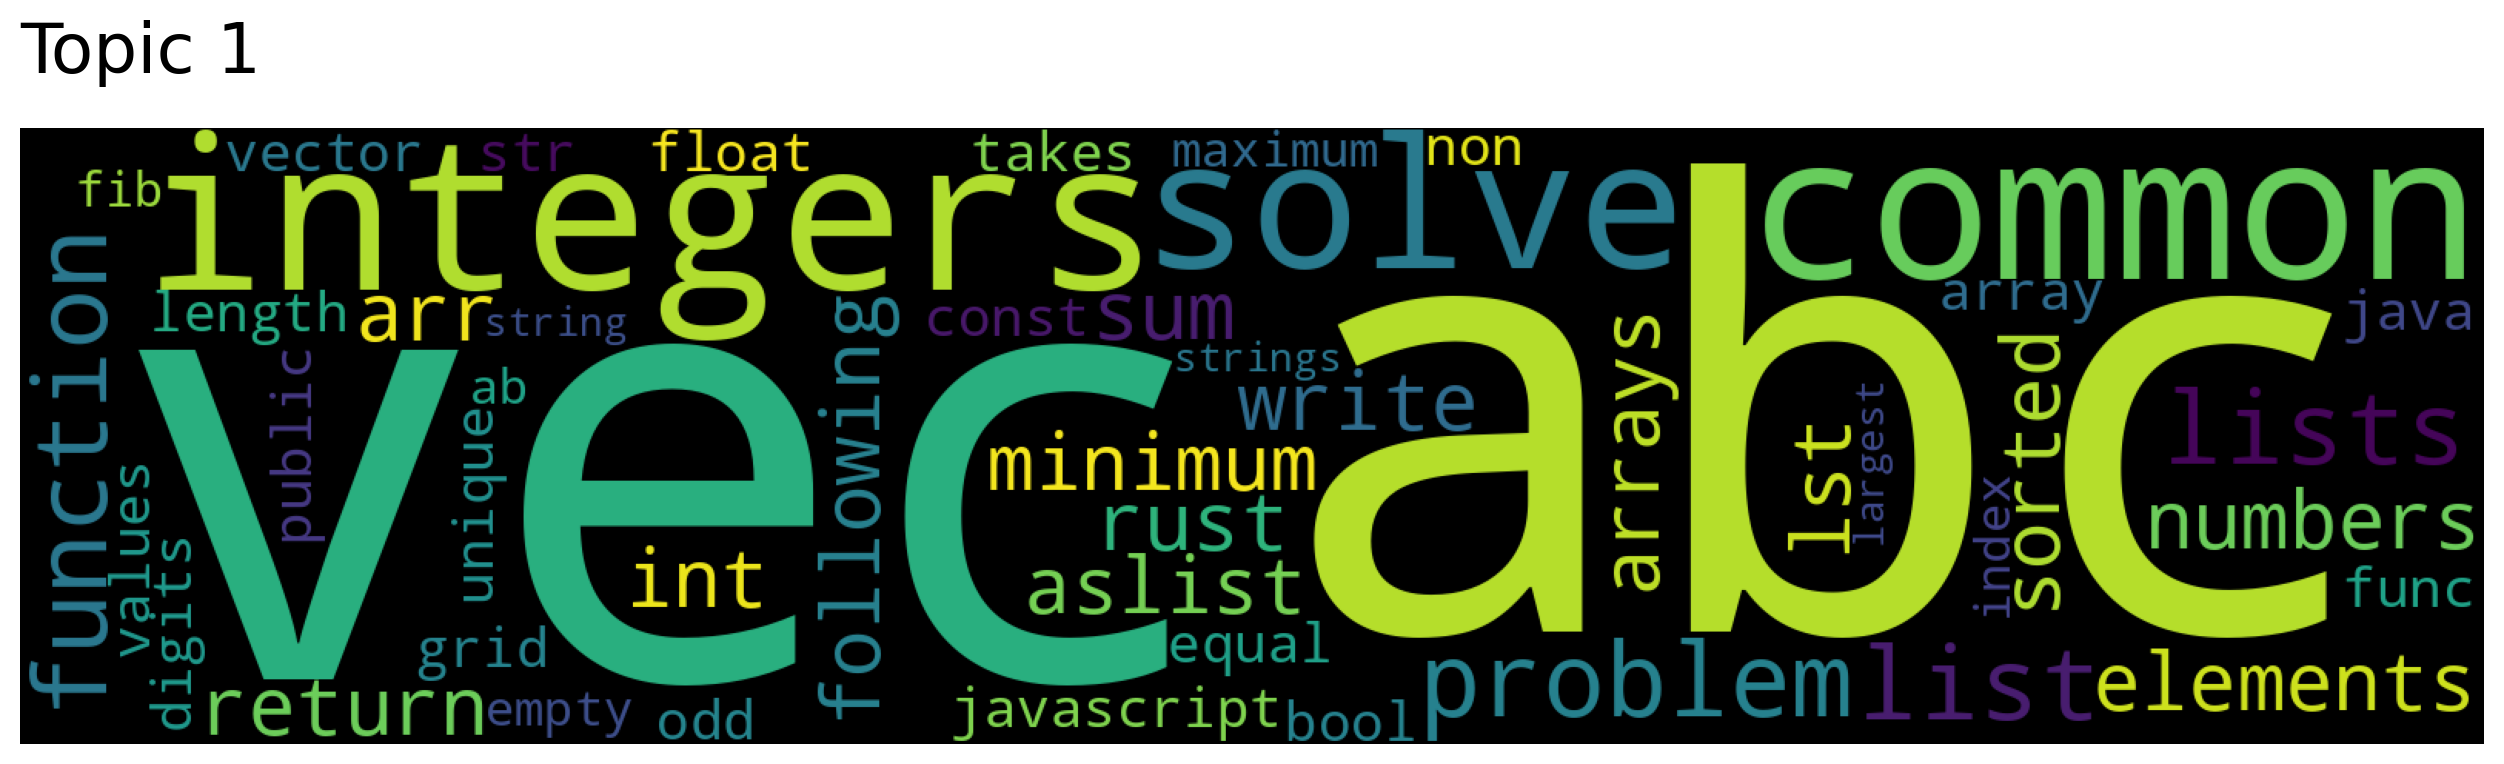

In [29]:
model.generate_topic_wordcloud(1)

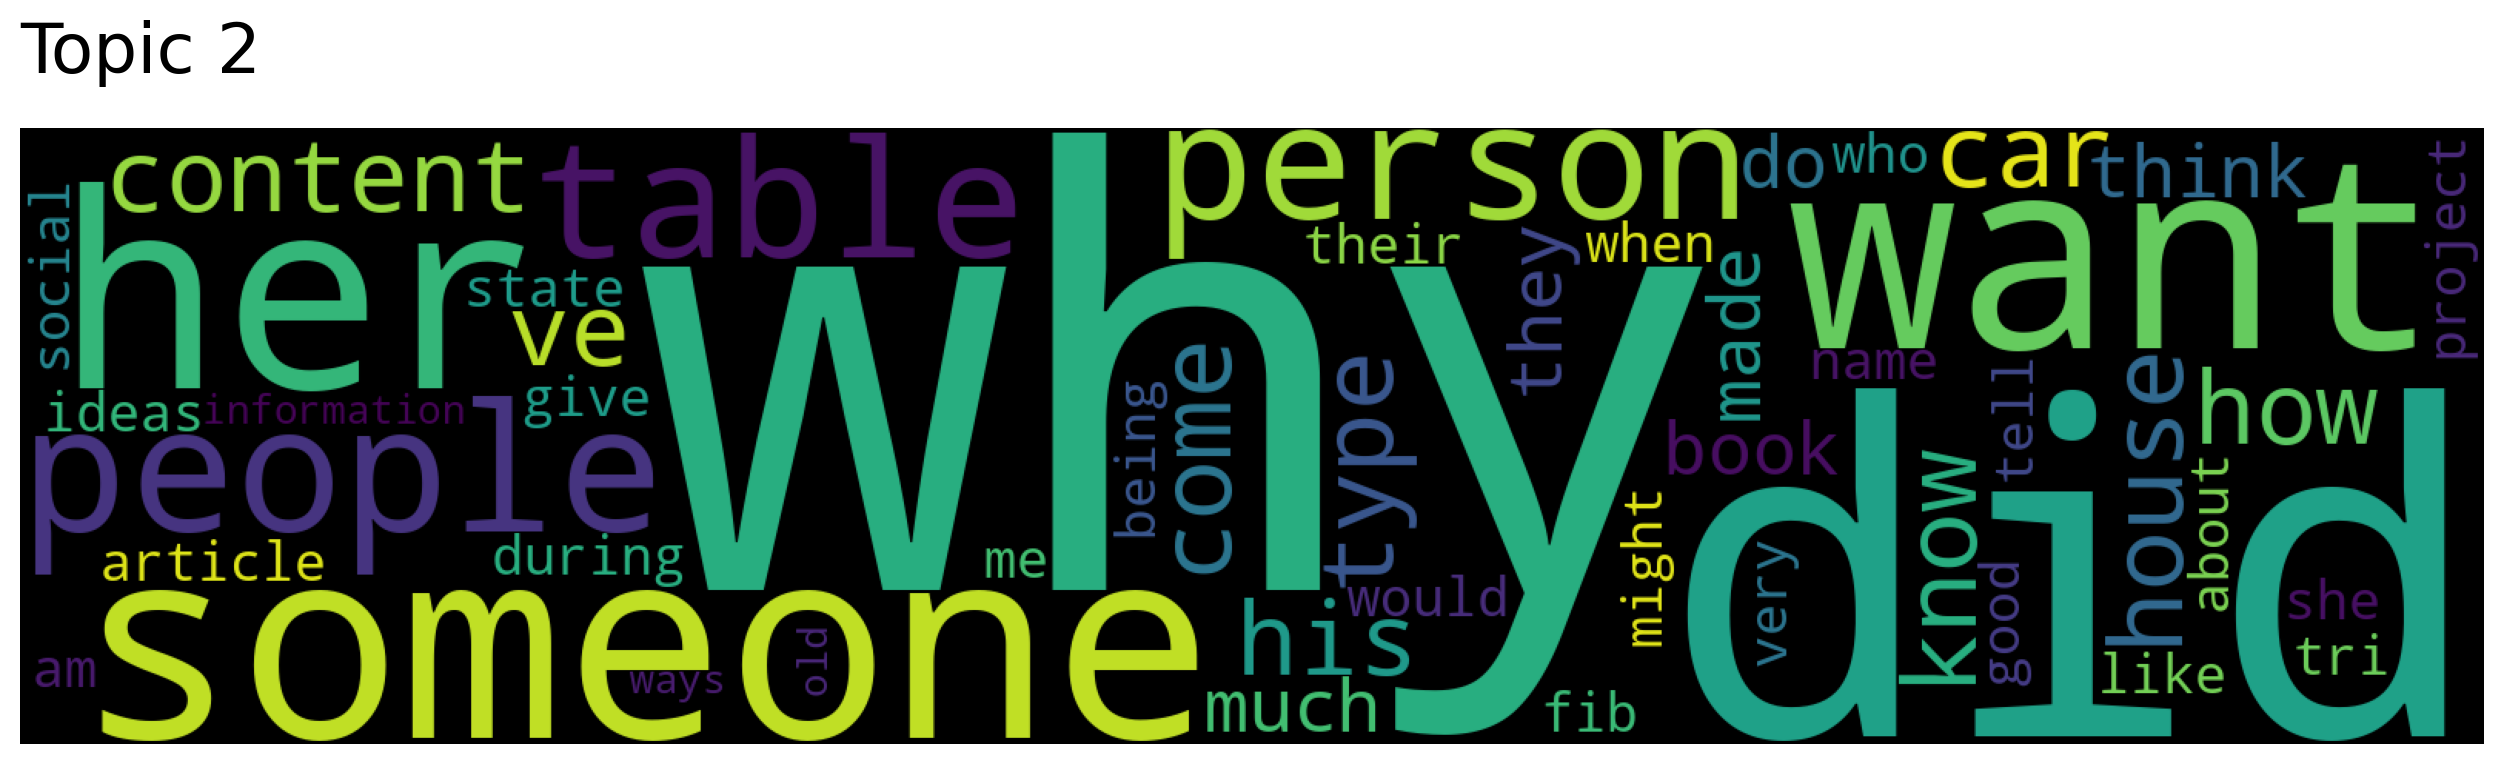

In [30]:
model.generate_topic_wordcloud(2)

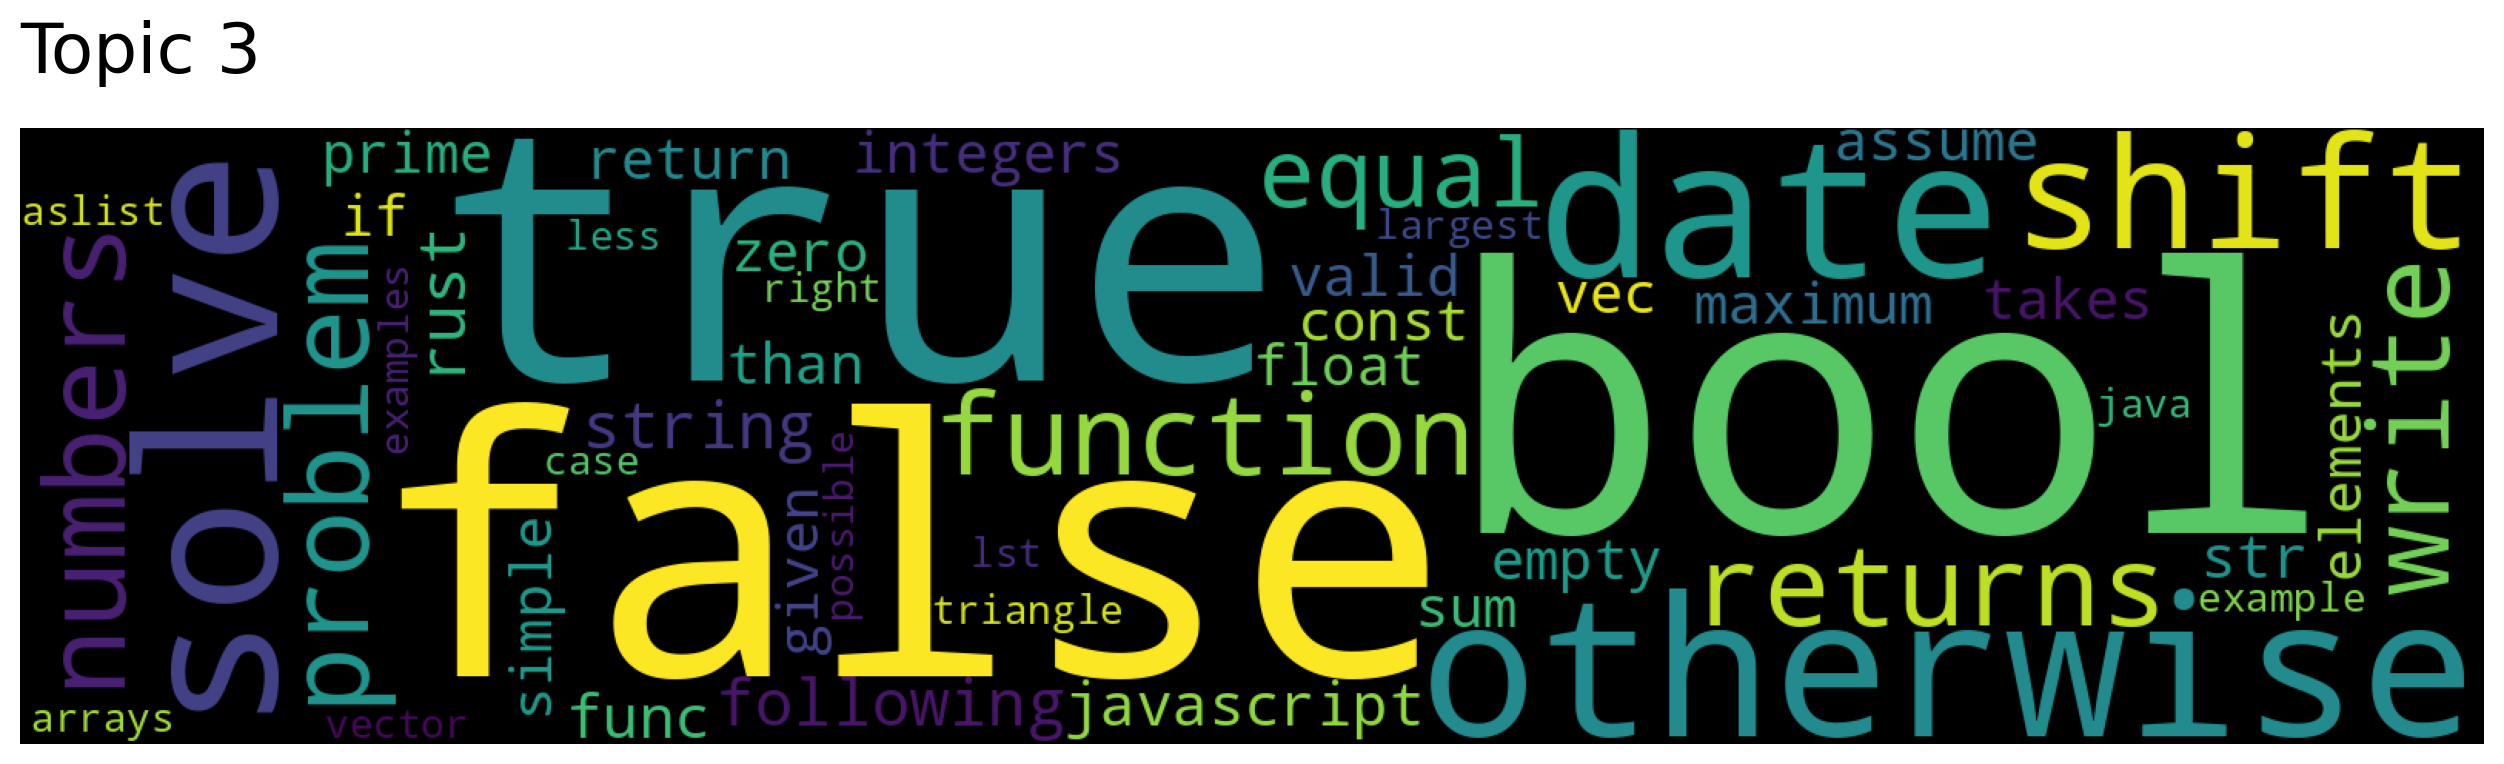

In [31]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [ ]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

Using the wordclouds, model.search_documents_by_topic, model.topic_words

**Give a 2-4 word summary for each of the the top four topics** ⭕

Your answers here:
topic0:Math and Arithmetic Operations
topic1:Programming and Computer Science
topic2:Social and Human Sciences
topic3:Boolean logic and conditional statements
